**Task:** For this lesson you must develop Python code to transform the daily female births dataset into
a supervised learning format with some number of inputs and one output.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
import os

/Users/kmilway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
birth_data = pd.read_csv('daily-total-female-births.csv')
#birth_data.set_index('Date', drop=True, inplace=True)
print(birth_data.head())

         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44


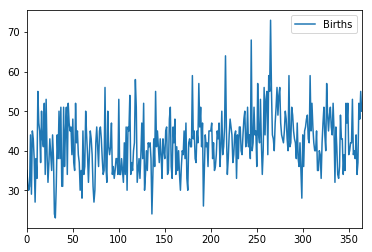

In [3]:
birth_data.plot()
plt.show()

The lesson suggestes that transforming this data into a supervised learning set is best done by using a sliding window transformation. Below are the parameters to set this window.

### Set sliding window width and verify that it is a legitimate number

In [4]:
window_width = 3

In [5]:
# Check that the window width is reasonably small compared to the data set size
def check_size(width, data):
    num_samples = data.shape[0]
    # Set the tolerance of this function, i.e. how small should the window be relative to the data set size?
    tol = 50
    if (num_samples/width >= tol):
        print('A window width of ', width, ' is reasonably small compared to the dataset.')
    else:
        print('A window width of ', width, ' is not sufficiently small compared to the dataset.')
    
check_size(window_width,birth_data)

A window width of  3  is reasonably small compared to the dataset.


### Perform transformation

In [6]:
num_samples = birth_data.shape[0]
inputs = list()
outputs = list()
for i in list(range(0,num_samples - (window_width),1)):
    input_set = birth_data.iloc[i:i+window_width,1].values.transpose()
    output_set = birth_data.iloc[i+window_width,1]
    inputs.append(input_set)
    outputs.append(output_set)
    
#print('Inputs:', inputs)
#print('Outputs:', outputs)

In [7]:
os.remove('inputs.csv') if os.path.exists('inputs.csv') else None
input_df = pd.DataFrame(inputs)
input_df.to_csv('inputs.csv',index=False, header=None)

In [8]:
os.remove('outputs.csv') if os.path.exists('outputs.csv') else None
output_df = pd.DataFrame(outputs)
output_df.to_csv('outputs.csv',index=False,header=None)